#### DSC640-T301 
#### Week-9 Exercise 
##### Chitramoy Mukherjee
##### Date: 11/04/2024

#### Import TSA complaint data.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


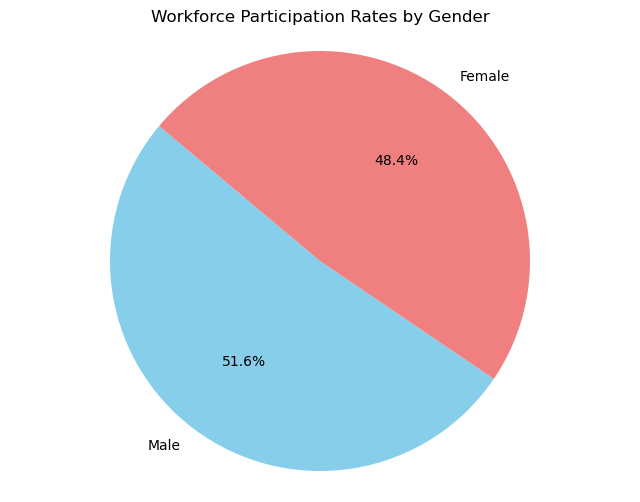

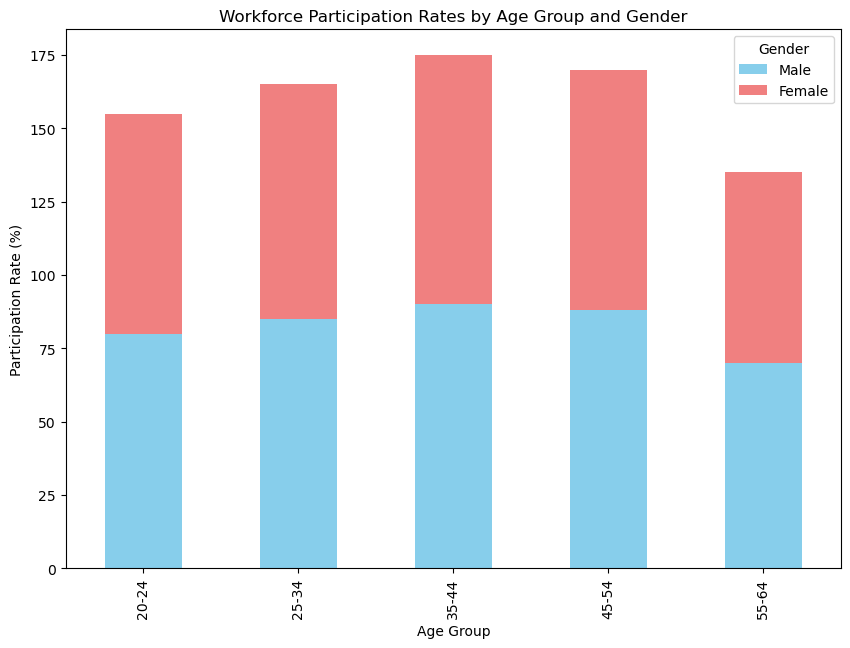

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
# Sample data
data = {
    'Age_Group': ['20-24', '25-34', '35-44', '45-54', '55-64'],
    'Male': [80, 85, 90, 88, 70],
    'Female': [75, 80, 85, 82, 65]
}
# Create DataFrame
df = pd.DataFrame(data)
# Pie Chart for Workforce Participation Rates by Gender
gender_totals = df[['Male', 'Female']].sum()
plt.figure(figsize=(8, 6))
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Workforce Participation Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.plt.show()
# Stacked Bar Chart for Workforce Participation Rates by Age Group and Gender
df.set_index('Age_Group', inplace=True)
df.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 7))
plt.title('Workforce Participation Rates by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Participation Rate (%)')
plt.legend(title='Gender')
plt.show()

In [90]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\Chitramoy\Desktop\MS-DSC\DSC-640\Week-4\merged_access_records_2023.csv"

# Specify dtypes for the mixed-type columns
dtype_dict = {
    7: str,
    8: str,
    13: str,
    26: str,
    28: str
}

# Read the CSV file with specified dtypes
data = pd.read_csv(file_path, dtype=dtype_dict)

# Display the first few rows of the DataFrame
print(data.head())



  Last Name First Name Middle Initial     UIN    BDGNBR Access Type  \
0     AABYE       MARY              A  U13230  197546.0          VA   
1     AALST      CARLO              B  U10746       NaN          VA   
2  AARONSON      SCOTT              I  U21068  201034.0          VA   
3      ABAD       JOHN              C  U11018       NaN          VA   
4    ABADIE     NATHAN              D  U15945       NaN          VA   

                   TOA  POA  TOD  POD  ... Visitee Last Name  \
0  Jan 19 2023  8:58AM  NaN  NaN  B04  ...           Epstein   
1  Jan  3 2023  9:37AM  NaN  NaN  NaN  ...            Office   
2  Jan 31 2023 10:42AM  NaN  NaN  D03  ...         Durkovich   
3                  NaN  NaN  NaN  NaN  ...            Office   
4  Jan 21 2023  9:46AM  NaN  NaN  NaN  ...            Office   

  Visitee First Name Meeting Location         Meeting Room  Caller Last Name  \
0              Diana             OEOB  Bowling Alley - 037           EPSTEIN   
1           Visitors        

In [128]:
# Display all columns
print(df.columns)

Index(['Last Name', 'First Name', 'Middle Initial', 'UIN', 'BDGNBR',
       'Access Type', 'TOA', 'POA', 'TOD', 'POD', 'Appointment Made Date',
       'Appointment Start Date', 'Appointment End Date',
       'Appointment Cancel Date', 'Total People', 'Last Updated By', 'POST',
       'Last Entry Date', 'Terminal Suffix', 'Visitee Last Name',
       'Visitee First Name', 'Meeting Location', 'Meeting Room',
       'Caller Last Name', 'Caller First Name', 'Caller Room', 'Release Date'],
      dtype='object')


In [130]:
# Data Cleanup: Drop unnecessary columns and handle missing values
data_cleaned = data.drop(columns=['UIN', 'BDGNBR', 'TOA', 'TOD', 
                                  'Last Updated By', 'POST', 'Last Entry Date', 'Terminal Suffix', 
                                  'Meeting Room', 'Caller Room'])

In [175]:
# Convert date columns to datetime
data_cleaned['Appointment Made Date'] = pd.to_datetime(data_cleaned['Appointment Made Date'], errors='coerce')
data_cleaned['Appointment Start Date'] = pd.to_datetime(data_cleaned['Appointment Start Date'], errors='coerce')
data_cleaned['Appointment End Date'] = pd.to_datetime(data_cleaned['Appointment End Date'], errors='coerce')
data_cleaned['Appointment Cancel Date'] = pd.to_datetime(data_cleaned['Appointment Cancel Date'], errors='coerce')

# Calculate 'Days in Advance' for each appointment (difference between APPT_MADE_DATE and APPT_START_DATE)
data_cleaned['DAYS_IN_ADVANCE'] = (data_cleaned['Appointment Start Date'] - data_cleaned['Appointment Made Date']).dt.days

# Filter out canceled appointments
data_filtered = data_cleaned[data_cleaned['Appointment Cancel Date'].isnull()]

# Drop rows with missing dates
data_filtered = data_filtered.dropna(subset=['Appointment Made Date', 'Appointment Start Date', 'DAYS_IN_ADVANCE'])


In [247]:
# Filter out canceled appointments and rows with missing or invalid data
df_filtered = df[df['Appointment Cancel Date'].isnull()]
df_filtered = data_filtered.dropna(subset=['Appointment Made Date', 'Appointment Start Date', 'DAYS_IN_ADVANCE'])

# Extract month for time-based analysis
df_filtered['APPT_MONTH'] = df_filtered['Appointment Start Date'].dt.to_period('M')

# Count the number of appointments per Visitee
top_visitees = data_filtered['Visitee Last Name'].value_counts().nlargest(5).index

# Filter data for the top 10 visitees
df_top_visitees = data_filtered[data_filtered['Visitee Last Name'].isin(top_visitees)]

# Group by Visitee Last Name and calculate the average days in advance for each
grouped_by_visitee = df_top_visitees.groupby('Visitee Last Name')['DAYS_IN_ADVANCE'].mean().reset_index()
grouped_by_visitee = grouped_by_visitee.rename(columns={'DAYS_IN_ADVANCE': 'AVERAGE_DAYS_IN_ADVANCE'})

# Sort by average days in advance
grouped_by_visitee_sorted = grouped_by_visitee.sort_values(by='AVERAGE_DAYS_IN_ADVANCE', ascending=False)

# Extract month for time-based analysis
df_filtered['APPT_MONTH'] = df_filtered['Appointment Start Date'].dt.to_period('M')

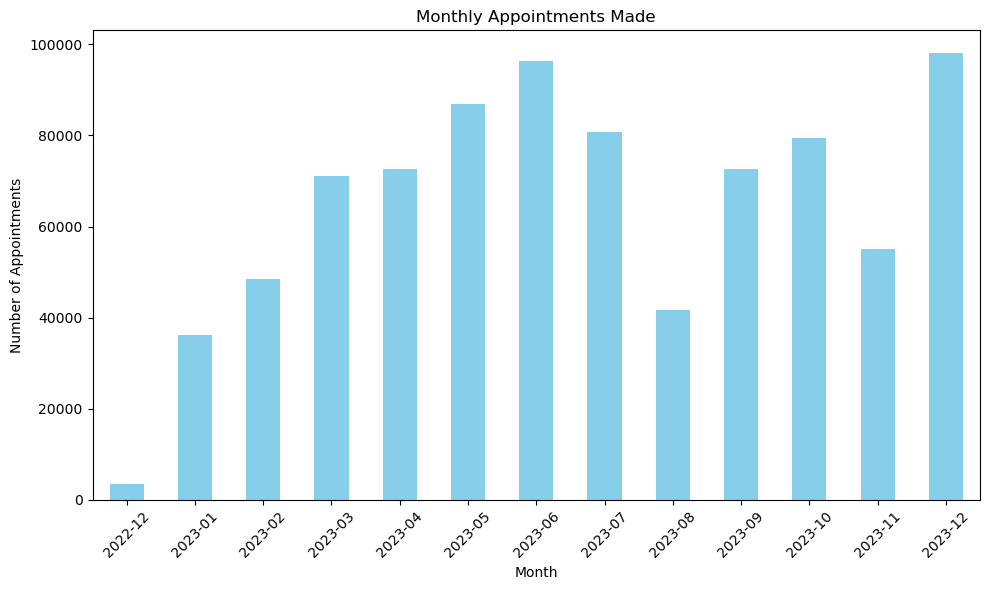

In [259]:
# Visual 1: Monthly Appointments Count (Bar Chart)
monthly_appointments = data['Appointment Made Date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_appointments.plot(kind='bar', color='skyblue')
plt.title('Monthly Appointments Made')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


C:\Users\Chitramoy\AppData\Local\Temp\ipykernel_6952\2889018711.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOTAL_APPOINTMENTS', y='Visitee Last Name', data=grouped_by_visitee_count, palette='Greens_r')


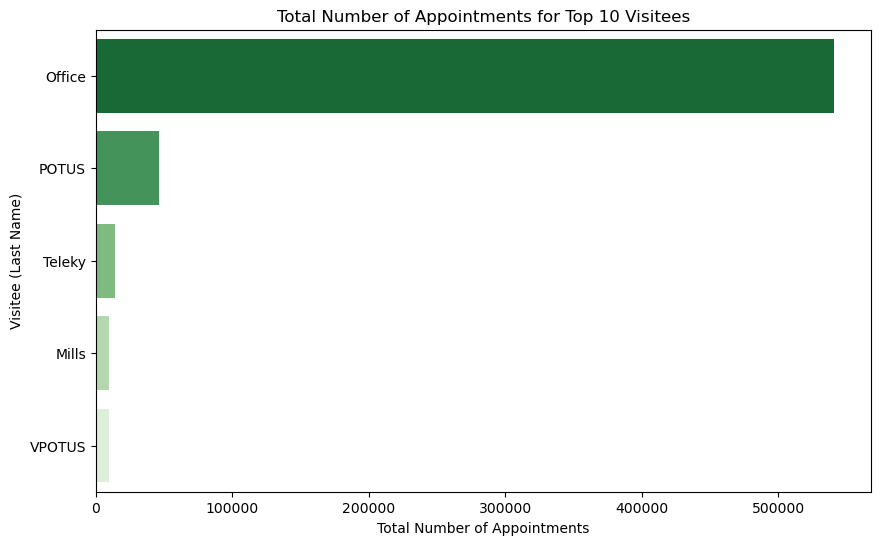

In [239]:
### Visualization 2: Column Chart - Total Appointments per Visitee ###
grouped_by_visitee_count = df_top_visitees['VISITEE_NAMELAST'].value_counts().reset_index()
grouped_by_visitee_count.columns = ['VISITEE_NAMELAST', 'TOTAL_APPOINTMENTS']

# Column chart
plt.figure(figsize=(10,6))
sns.barplot(x='TOTAL_APPOINTMENTS', y='Visitee Last Name', data=grouped_by_visitee_count, palette='Greens_r')
plt.title('Total Number of Appointments for Top 10 Visitees')
plt.xlabel('Total Number of Appointments')
plt.ylabel('Visitee (Last Name)')
plt.show()

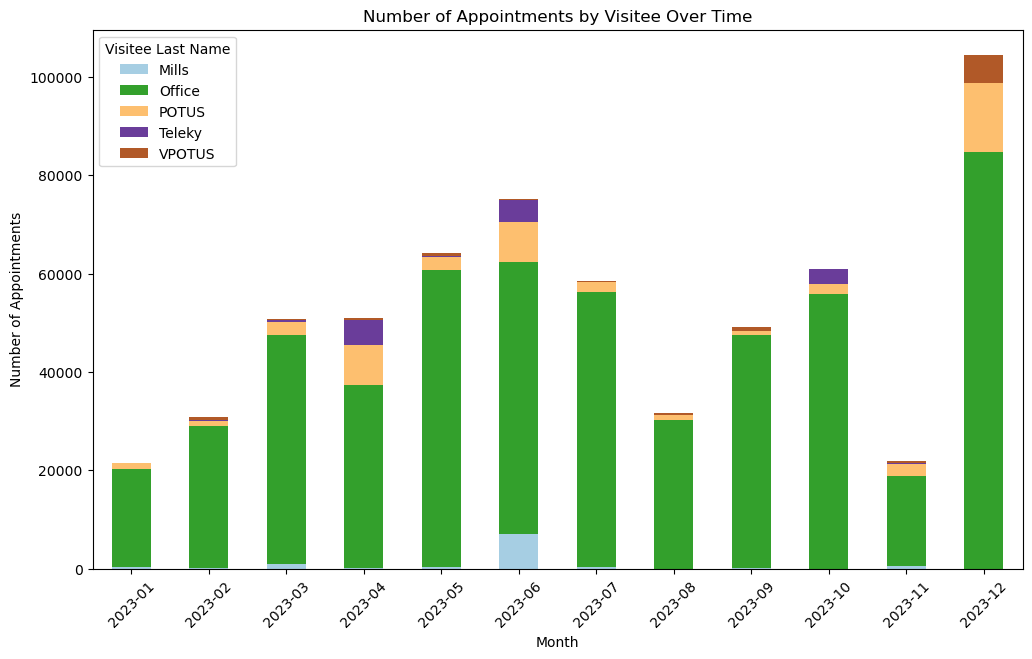

In [263]:
### Visualization 3: Stacked Bar Chart with Time ###
# Group by month and visitee to get count of appointments
appointments_by_month_visitee = df_top_visitees.groupby(['APPT_MONTH', 'Visitee Last Name']).size().unstack(fill_value=0)

# Plot stacked bar chart
appointments_by_month_visitee.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Paired')
plt.title('Number of Appointments by Visitee Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Visitee Last Name')
plt.show()

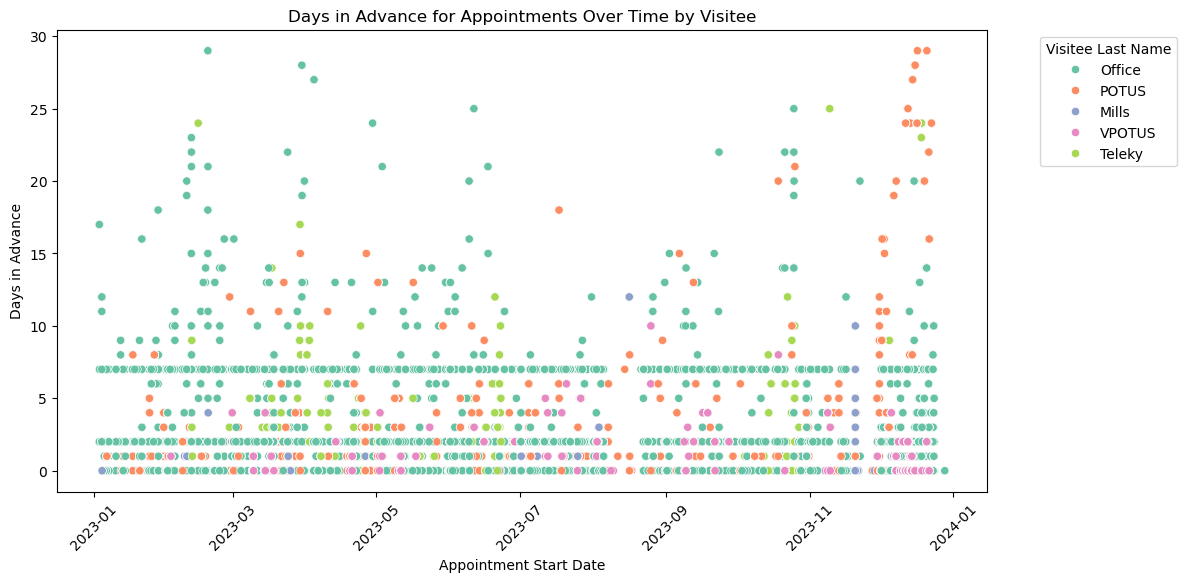

In [265]:
### Visualization 4: Scatterplot with Time ###
# Scatterplot showing days in advance over time for each visitee
plt.figure(figsize=(12,6))
sns.scatterplot(x='Appointment Start Date', y='DAYS_IN_ADVANCE', hue='Visitee Last Name', data=df_top_visitees, palette='Set2')
plt.title('Days in Advance for Appointments Over Time by Visitee')
plt.xlabel('Appointment Start Date')
plt.ylabel('Days in Advance')
plt.legend(title='Visitee Last Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

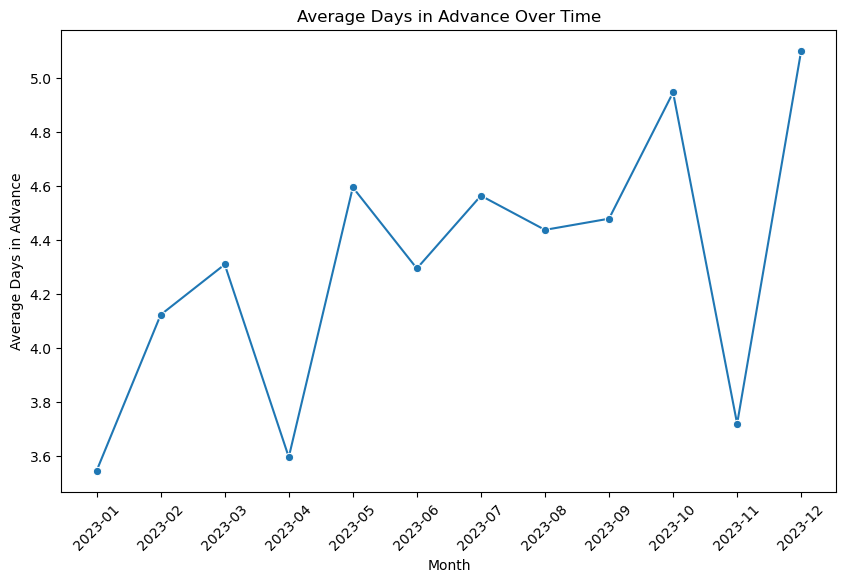

In [252]:
### Visualization 5: Line Chart with Time ###
# Convert the 'APPT_MONTH' period to string format
avg_days_by_month['APPT_MONTH'] = avg_days_by_month['APPT_MONTH'].astype(str)

# Plot the line chart with the fixed data type
plt.figure(figsize=(10,6))
sns.lineplot(x='APPT_MONTH', y='DAYS_IN_ADVANCE', data=avg_days_by_month, marker='o')
plt.title('Average Days in Advance Over Time')
plt.xlabel('Month')
plt.ylabel('Average Days in Advance')
plt.xticks(rotation=45)
plt.show()


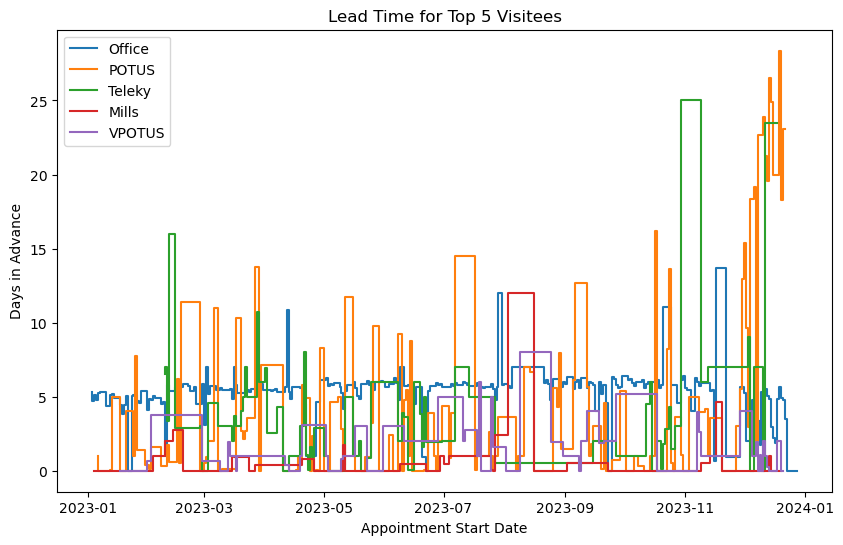

In [273]:
### Visualization 6: Step Chart - Lead Time for Top 5 Visitees ###
top_5_visitees = df_top_visitees['Visitee Last Name'].value_counts().nlargest(5).index

plt.figure(figsize=(10,6))
for visitee in top_3_visitees:
    visitee_data = df_top_visitees[df_top_visitees['Visitee Last Name'] == visitee]
    lead_time = visitee_data.groupby(visitee_data['Appointment Start Date'].dt.date)['DAYS_IN_ADVANCE'].mean().reset_index()
    plt.step(lead_time['Appointment Start Date'], lead_time['DAYS_IN_ADVANCE'], label=visitee)

plt.title('Lead Time for Top 5 Visitees')
plt.xlabel('Appointment Start Date')
plt.ylabel('Days in Advance')
plt.legend()
plt.show()

C:\Users\Chitramoy\AppData\Local\Temp\ipykernel_6952\3403664704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AVERAGE_DAYS_IN_ADVANCE', y='Visitee Last Name', data=grouped_by_visitee_sorted, palette='Blues_r')


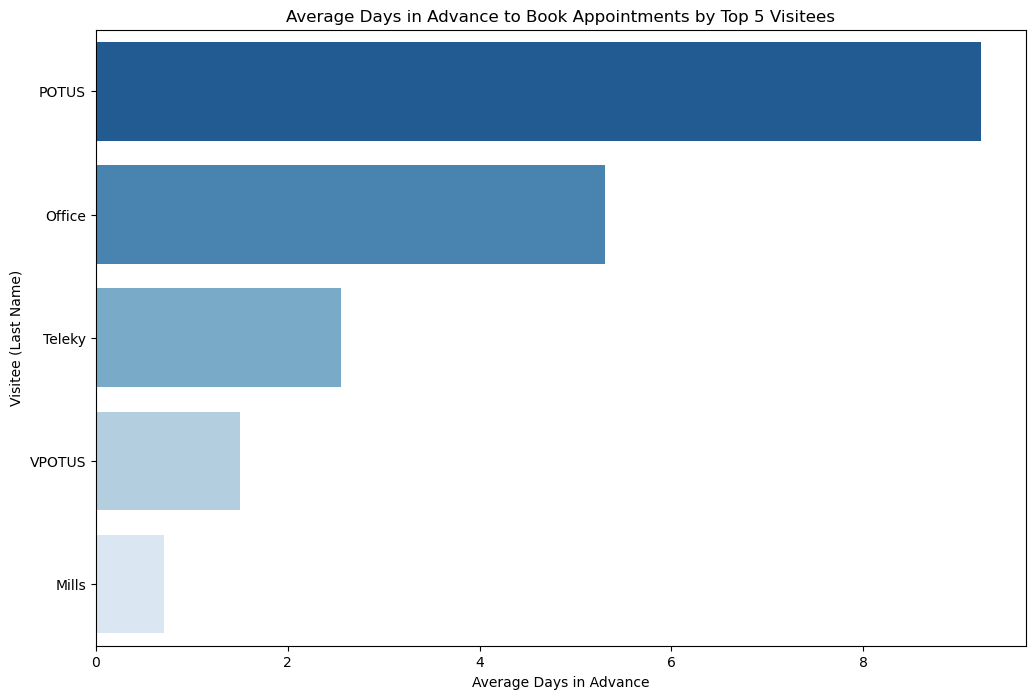

In [275]:
# Visualization 7: Bar Chart of Average Days in Advance for Each Visitee
plt.figure(figsize=(12,8))
sns.barplot(x='AVERAGE_DAYS_IN_ADVANCE', y='Visitee Last Name', data=grouped_by_visitee_sorted, palette='Blues_r')
plt.title('Average Days in Advance to Book Appointments by Top 5 Visitees')
plt.xlabel('Average Days in Advance')
plt.ylabel('Visitee (Last Name)')
plt.show()
